# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [2]:
def find_product(a, r, N):
    a_prev = a
    arr_product = list()
    arr_product.append(a)
    for i in range(1, N):
        a_cur = a_prev * r
        arr_product.append(a_cur)
        a_prev = a_cur
    return arr_product


a = 2
r = 3
N = 3
print(find_product(a, r, N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [3]:
def check_palindrome(N):
    # rev_n = ''.join(reversed(str(N)))
    if str(N) == ''.join(reversed(str(N))):
        return True
    else:
        return False


for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [4]:
def find_palindromes(N):
    palindromes = list()
    start = 1000
    while N > 0:
        if check_palindrome(start):
            palindromes.append(start)
            N -= 1
        start += 1
    return palindromes


print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/>
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [5]:
from random import randint


def find_min(a, b, c):
    min_ = a
    if min_ > b:
        min_ = b
    elif min_ > c:
        min_ = c
    return min_


for i in range(10):
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)

    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-88 -7 -90 	Minimum: -90
-3 -14 67 	Minimum: -14
-72 -55 21 	Minimum: -72
65 27 36 	Minimum: 27
89 11 -66 	Minimum: 11
-64 3 -46 	Minimum: -64
25 -43 46 	Minimum: -43
68 -50 67 	Minimum: -50
-86 -27 -57 	Minimum: -86
-94 -59 -76 	Minimum: -94


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [6]:
k = np.random.rand(17)
my_array =  np.array(k / sum(k) * 6)
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [134]:
def calculate_manhattan(a, b):
    distance = np.sum(np.abs(a-b))
    return distance


def calculate_euclidean(a, b):
    distance = np.sqrt(np.sum(np.square(a-b)))
    return distance


def calculate_chebyshev(a, b):
    distance = np.abs(a-b).max()
    return distance


def calculate_cosine(a, b):
    tmp_1 = np.abs(np.sqrt(np.sum(a ** 2)))
    tmp_2 = np.abs(np.sqrt(np.sum(b ** 2)))
    distance = np.dot(a,b) / (tmp_1 * tmp_2)
    return distance

def my_func(vector_a, vector_b):
    return np.sum(abs(vector_a ** 2 - vector_b ** 2))

In [135]:
a = np.random.rand(10)
b = np.random.rand(10)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')
print(my_func(np.array([-1, -3]), np.array([-5, 6])))

Manhattan distance: 4.781365040289065
Euclidean distance: 1.6052761250063017
Chebyshev distance: 0.7080753604373375
Cosine distance: 0.546109029095079
51


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [9]:
def transform(array):
    array[array > -1] = -1
    array[array < -4] = -4
    transformed_array = np.sort(array)
    return transformed_array

In [10]:
my_array = np.random.randint(-100, 100, size=76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4
Max: -1
Array:
[-4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4
 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -4 -3 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [11]:
my_array =  np.random.randint(-7,43, size=(8,5))
## Your code here
tmp = np.argmax(np.max(my_array, axis=0))
selected_column = my_array[:, tmp]
## Your code here
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)

Shape:  (8, 5)
Array:
[[37  0 -3 30 27]
 [23  7 17 -1 16]
 [28 11  6 38 -7]
 [40 22 17 14  6]
 [-3 14 19 40 16]
 [39 29  2  8 13]
 [38 12  5 24 14]
 [40 11  1 -3  7]]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [12]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.67549953 0.33411819        nan 0.99231092 0.59600831 0.81239151
 0.31766103        nan 0.0582942         nan]


In [13]:
def replace_missing(arr):
    arr[np.isnan(arr)] = np.nanmedian(arr)
    array_without_missing = arr
    return array_without_missing

In [14]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.67549953 0.33411819 0.59600831 0.99231092 0.59600831 0.81239151
 0.31766103 0.59600831 0.0582942  0.59600831]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [15]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=tuple(range(X.ndim-1)))
    return mean_vector

In [16]:
n = 19
m = 23
X = np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-2.3020595  -1.7826087  -1.93363844]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [17]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis=1)
    return X_unique

In [18]:
X = np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[4 4 5]
  [4 4 5]
  [5 5 5]]

 [[4 5 5]
  [4 4 4]
  [4 4 4]]

 [[5 4 4]
  [5 5 5]
  [5 4 4]]

 [[5 4 5]
  [4 5 5]
  [4 5 4]]

 [[5 5 4]
  [4 4 5]
  [5 4 5]]

 [[4 5 5]
  [5 4 5]
  [4 4 5]]

 [[4 4 4]
  [4 5 5]
  [4 4 5]]

 [[5 4 5]
  [4 5 4]
  [5 5 4]]

 [[4 4 4]
  [4 4 4]
  [4 4 5]]

 [[5 5 4]
  [4 4 5]
  [4 4 5]]

 [[5 5 5]
  [5 4 5]
  [4 5 4]]

 [[5 4 5]
  [4 4 4]
  [5 4 5]]

 [[4 4 5]
  [4 5 4]
  [4 5 5]]

 [[4 5 5]
  [5 4 5]
  [4 4 4]]

 [[4 5 4]
  [4 5 4]
  [5 4 4]]

 [[5 4 5]
  [5 4 5]
  [5 4 4]]

 [[4 5 5]
  [4 4 4]
  [4 5 4]]

 [[4 4 4]
  [5 5 4]
  [5 4 4]]

 [[5 4 5]
  [5 4 5]
  [4 4 5]]]
Unique columns:


array([[[4, 4, 5],
        [4, 4, 5],
        [5, 5, 5]],

       [[4, 4, 4],
        [4, 5, 5],
        [4, 4, 4]],

       [[5, 5, 5],
        [5, 4, 4],
        [5, 4, 4]],

       [[4, 5, 5],
        [5, 4, 5],
        [4, 5, 4]],

       [[4, 4, 5],
        [5, 5, 4],
        [5, 4, 5]],

       [[5, 4, 5],
        [4, 5, 5],
        [4, 4, 5]],

       [[4, 5, 5],
        [4, 4, 4],
        [4, 4, 5]],

       [[4, 5, 4],
        [5, 4, 5],
        [5, 5, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 5]],

       [[4, 4, 5],
        [5, 5, 4],
        [4, 4, 5]],

       [[5, 4, 5],
        [5, 5, 5],
        [4, 5, 4]],

       [[4, 4, 4],
        [5, 4, 5],
        [5, 4, 5]],

       [[4, 5, 4],
        [4, 4, 5],
        [4, 5, 5]],

       [[5, 4, 5],
        [4, 5, 5],
        [4, 4, 4]],

       [[4, 5, 4],
        [4, 5, 4],
        [5, 4, 4]],

       [[5, 4, 5],
        [5, 4, 5],
        [5, 4, 4]],

       [[4, 4, 4],
        [4, 5, 5],
        [4, 5, 4]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data =  pd.read_csv('../datasets/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

Пропущенные значения имеются в столбцах <i>Age</i>, <i>Cabin</i> и <i>Embarked</i>


In [21]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Можно заметить, что проценты выживших людей в зависимости от класса сильно разняться. Чем выше цифра класса(чем дешевле) тем ниже процент выживаемости. Скорее всего люди из 1 класса были в приоритете на эвакуацию, чем люди из 3 класса.

In [22]:
grouped_data_per_class_and_surv_count = data.groupby(['Survived', 'Pclass'])['Survived'].count()
display(grouped_data_per_class_and_surv_count)


print("Процент выживших пассажиров:", data['Survived'].sum() / data['Survived'].count())
print("Процент выживших пассажиров 1 класса:", grouped_data_per_class_and_surv_count[1][1] / (grouped_data_per_class_and_surv_count[1][1] + grouped_data_per_class_and_surv_count[0][1]))
print("Процент выживших пассажиров 2 класса:", grouped_data_per_class_and_surv_count[1][2] / (grouped_data_per_class_and_surv_count[1][1] + grouped_data_per_class_and_surv_count[0][2]))
print("Процент выживших пассажиров 3 класса:", grouped_data_per_class_and_surv_count[1][3] / (grouped_data_per_class_and_surv_count[1][1] + grouped_data_per_class_and_surv_count[0][3]))

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Survived, dtype: int64

Процент выживших пассажиров: 0.3838383838383838
Процент выживших пассажиров 1 класса: 0.6296296296296297
Процент выживших пассажиров 2 класса: 0.37339055793991416
Процент выживших пассажиров 3 класса: 0.234251968503937


Мужчин было больше - 577, а женщин 314

In [23]:
grouped_data = data.groupby("Sex")['Sex'].count()
grouped_data

Sex
female    314
male      577
Name: Sex, dtype: int64

Наименне популярный порт Q - Queenstown.

In [24]:
grouped_data = data.groupby('Embarked')['Embarked'].count().sort_values()
grouped_data

Embarked
Q     77
C    168
S    644
Name: Embarked, dtype: int64

Всего было 3 класса.

In [25]:
print(len(data['Pclass'].unique()))

3


In [26]:
mean_price_all = data['Fare'].mean()
print("Общая средняя цена:", mean_price_all)
median_price_per_class = data.groupby('Pclass')['Fare'].mean()
print("Средняя цена для 1 класса:", median_price_per_class[1])
print("Средняя цена для 2 класса:", median_price_per_class[2])
print("Средняя цена для 3 класса:", median_price_per_class[3])

Общая средняя цена: 32.2042079685746
Средняя цена для 1 класса: 84.1546875
Средняя цена для 2 класса: 20.662183152173913
Средняя цена для 3 класса: 13.675550101832993


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

Минимальный возраст - 0.42 лет, максимальный - 80. Средний возраст по кораблю составляет 29.7, по мужчинам - 30.73, а по женщинам - 27.92.
Людей с минимальным возрастом намного больше, чем людей с максимальным. Несмотря на то, что средний возраст по кораблю 29.69, пик возраста людей приходиться левее этого значения, это связано с тем, что присутствуют люди с 80 годами, так и с 0, что непосредственно влияет на средний возраст.


Минимальный возраст на корабле -  0.42 а максимальный -  80.0
Средний возраст по кораблю: 29.69911764705882
Средний возраст по кораблю среди мужчин: 30.72664459161148
Средний возраст по кораблю среди женщин: 27.915708812260537


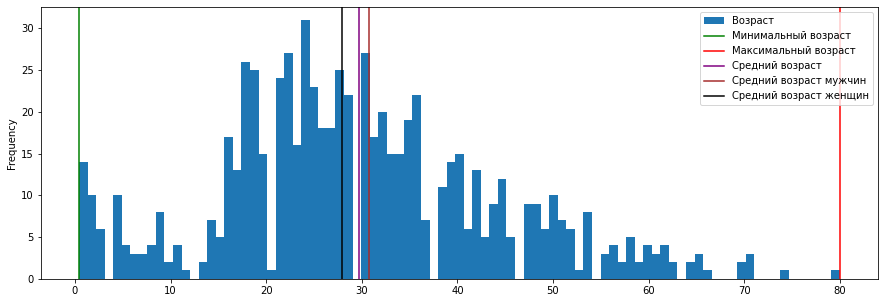

In [27]:
data['Age'].plot(kind='hist', bins=len(data['Age'].unique()), figsize=(15, 5));
print("Минимальный возраст на корабле - ", data['Age'].min(), 'а максимальный - ', data['Age'].max())
print('Средний возраст по кораблю:', data['Age'].mean())
print('Средний возраст по кораблю среди мужчин:', data.groupby(['Sex'])['Age'].mean()['male'])
print('Средний возраст по кораблю среди женщин:', data.groupby(['Sex'])['Age'].mean()['female'])
plt.axvline(x=data['Age'].min(), color='green')
plt.axvline(x=data['Age'].max(), color='red')
plt.axvline(x=data['Age'].mean(), color='purple')
plt.axvline(x= data.groupby(['Sex'])['Age'].mean()['male'], color='brown')
plt.axvline(x= data.groupby(['Sex'])['Age'].mean()['female'], color='black')
plt.legend(['Возраст', 'Минимальный возраст', 'Максимальный возраст', 'Средний возраст', 'Средний возраст мужчин', 'Средний возраст женщин'], loc='upper right');

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [28]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Всего уникальных названий - 31. Самый популярный мужской титул - Mr. (502 раза), а женский - Miss. (179 раз)

In [130]:
def my_func(text):
    my_dict = {'expensive':'exp.',
               'information':'inf.'}
    for word in text.split():
        # print(word)
        if word.strip('.') in my_dict.keys():
            if word[len(word) - 1] == '.':
                print(word)
                text = text.replace(word.strip('.'), my_dict[word.strip('.')].strip('.'))
            else:
                text = text.replace(word, my_dict[word.strip('.')])




    return text

In [131]:
# tmp_arr = list()
# for i in range(len(data['Name'].str.split(' '))):
#     for word in data['Name'].str.split(' ')[i]:
#         if '.' in word:
#             tmp_arr.append(word)
# titles = pd.Series(tmp_arr)
# print('Кол-во уникальных титулов:', len(titles.unique()))
# display(titles.value_counts())
# print('Самый популярный титул:', titles.value_counts().index[0])
# print('Самый НЕпопулярный титул:', titles.value_counts().index[17])

print(my_func('I supposed that this information costs more expensive. For real this information costs not so expensive...'))

expensive.
expensive...
I supposed that this inf. costs more exp. For real this inf. costs not so exp...


**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



Можно заметить, что для первого класса первые два пика находятся от 30 до 100, для второго от 10 до 30, а для третьего один пик возле 10, значит можно сказать, что присутствует корреляция, так как в зависимости от класса преобладают разные цены за билеты. У первого класса присутствуют билеты за 200 и 500, а например в 3 классе около 300 человек купили билет по 10, так как он является самым дешевым классом. Во втором классе около 60 человек купили билет по чуть дороже 10, что в общем намного дешевле 1 класса, и немного дороже 3 класса. Однако на всех графиках можно заметить, что чем дороже цена билета, тем меньше людей их купило. Средняя цена 1 класса очень сильно отличается от цены второго и третьего класса.

Средняя цена для первого класса - 84.15
Средняя цена для второго класса - 20.66
Средняя цена для третьего класса - 13.67

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


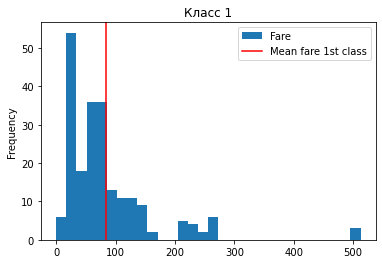

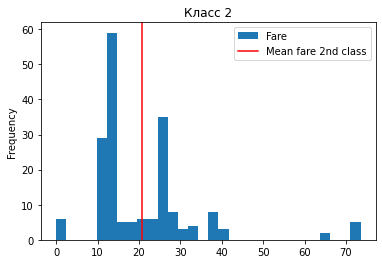

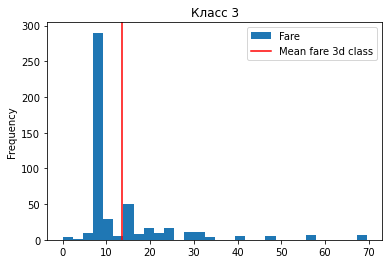

In [30]:
mean_fare = (
    data.pivot_table(index='Pclass', values='Fare')
)
display(mean_fare)
data[(data['Pclass'] == 1)]['Fare'].plot(kind='hist', bins=30, title='Класс ' + str(1));
plt.axvline(x=mean_fare['Fare'][1], color='red')
plt.legend(['Fare', 'Mean fare 1st class'])
plt.show()
data[(data['Pclass'] == 2)]['Fare'].plot(kind='hist', bins=30, title='Класс ' + str(2));
plt.axvline(x=mean_fare['Fare'][2], color='red')
plt.legend(['Fare', 'Mean fare 2nd class'])
plt.show()
data[(data['Pclass'] == 3)]['Fare'].plot(kind='hist', bins=30, title='Класс ' + str(3));
plt.axvline(x=mean_fare['Fare'][3], color='red')
plt.legend(['Fare', 'Mean fare 3d class'])
plt.show()

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

Для всех портов пик находиться в самом начале, потому что в независимости от порта люди выбирали самые дешевые билеты. Конечно можно заметить, что в порту C есть билеты за 500 из 1 класса, однако это не говорит нам о том, что цена билетов как-то привязана к портам. Корреляция отсутствует.

Средняя цена для порта C - 59.95
Средняя цена для порта Q - 13.27
Средняя цена для порта S - 27.07

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.079812


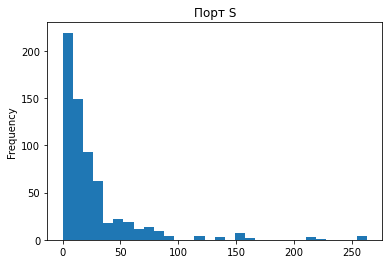

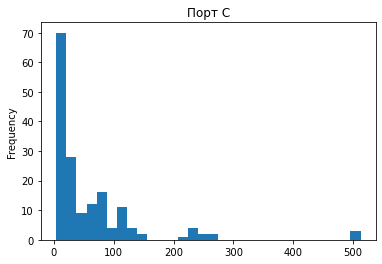

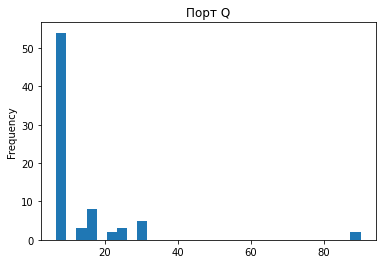

In [31]:
mean_fare = (
    pd.pivot_table(data, index='Embarked', values='Fare')
)
display(mean_fare)
for port in data[~data['Embarked'].isna()]['Embarked'].unique():
    data[(data['Embarked'] == port)]['Fare'].plot(kind='hist', bins=30, title='Порт ' + port);
    plt.show()

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

Средний возраст выживших людей:
- Общий: 28.34
- Мужчины: 27.27
- Женщины: 28.84
- 1 класс: 35.36
- 2 класс: 25.90
- 3 класс: 20.64

Средний возраст НЕвыживших людей:
- Общий: 30.94
- Мужчины: 31.61
- Женщины: 25.04
- 1 класс: 43.69
- 2 класс: 33.54
- 3 класс: 26.55


Можно заметить, что практически на всех гистограммах пик находиться на линии среднего возраста. Также везде пик выживших и НЕвыживших людей в независимости от пола - примерно 30 лет. Также можно увидеть на гистограммах, что много выживших среди слишком молодых людей - 0-10 и пожилых людей, это также зеркально видно, что их очень мало среди НЕвыживших.

In [32]:
grouped_data_per_class_and_surv = data.groupby(['Survived', 'Pclass'])['Age'].mean()
display(grouped_data_per_class_and_surv)


survived_mean_age = data[data['Survived'] == 1]['Age'].mean()
not_survived_mean_age = data[data['Survived'] == 0]['Age'].mean()
survived_mean_age_male = data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Age'].mean()
survived_mean_age_female = data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['Age'].mean()
not_survived_mean_age_male = data[(data['Survived'] == 0) & (data['Sex'] == 'male')]['Age'].mean()
not_survived_mean_age_female = data[(data['Survived'] == 0) & (data['Sex'] == 'female')]['Age'].mean()


survived_mean_age_first_class = grouped_data_per_class_and_surv[1][1]
survived_mean_age_second_class = grouped_data_per_class_and_surv[1][2]
survived_mean_age_third_class = grouped_data_per_class_and_surv[1][3]
not_survived_mean_age_first_class = grouped_data_per_class_and_surv[0][1]
not_survived_mean_age_second_class = grouped_data_per_class_and_surv[0][2]
not_survived_mean_age_third_class = grouped_data_per_class_and_surv[0][3]

Survived  Pclass
0         1         43.695312
          2         33.544444
          3         26.555556
1         1         35.368197
          2         25.901566
          3         20.646118
Name: Age, dtype: float64

In [33]:
print('Средний возраст выживших:', survived_mean_age)
print()
print('Средний возраст НЕвыживших:', not_survived_mean_age)
print()
print('Средний возраст выживших мужчин:', survived_mean_age_male)
print('Средний возраст выживших женщин:', survived_mean_age_female)
print()
print('Средний возраст НЕвыживших мужчин:', not_survived_mean_age_male)
print('Средний возраст НЕвыживших женщин:', not_survived_mean_age_female)
print()
print('Средний возраст выживших 1 класса:', survived_mean_age_first_class)
print('Средний возраст выживших 2 класса:', survived_mean_age_second_class)
print('Средний возраст выживших 3 класса:', survived_mean_age_third_class)
print()
print('Средний возраст НЕвыживших 1 класса:', not_survived_mean_age_first_class)
print('Средний возраст НЕвыживших 2 класса:', not_survived_mean_age_second_class)
print('Средний возраст НЕвыживших 3 класса:', not_survived_mean_age_third_class)


Средний возраст выживших: 28.343689655172415

Средний возраст НЕвыживших: 30.62617924528302

Средний возраст выживших мужчин: 27.276021505376345
Средний возраст выживших женщин: 28.84771573604061

Средний возраст НЕвыживших мужчин: 31.618055555555557
Средний возраст НЕвыживших женщин: 25.046875

Средний возраст выживших 1 класса: 35.36819672131148
Средний возраст выживших 2 класса: 25.90156626506024
Средний возраст выживших 3 класса: 20.646117647058823

Средний возраст НЕвыживших 1 класса: 43.6953125
Средний возраст НЕвыживших 2 класса: 33.544444444444444
Средний возраст НЕвыживших 3 класса: 26.555555555555557


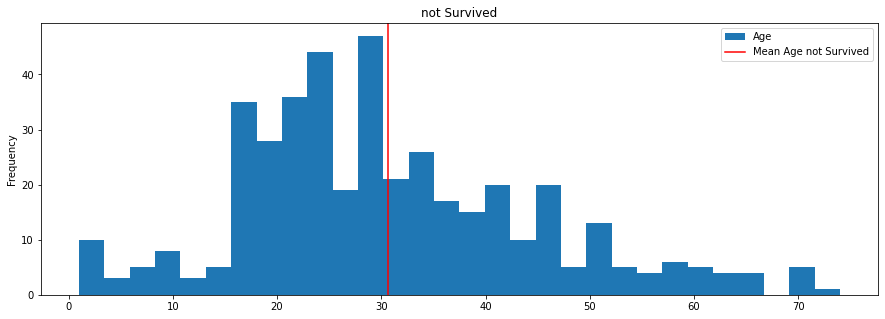

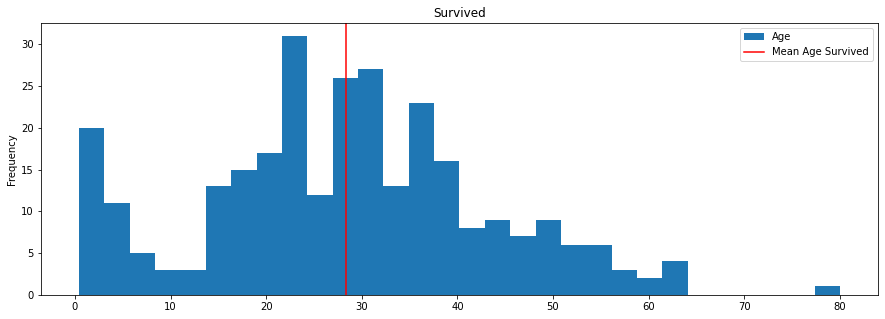

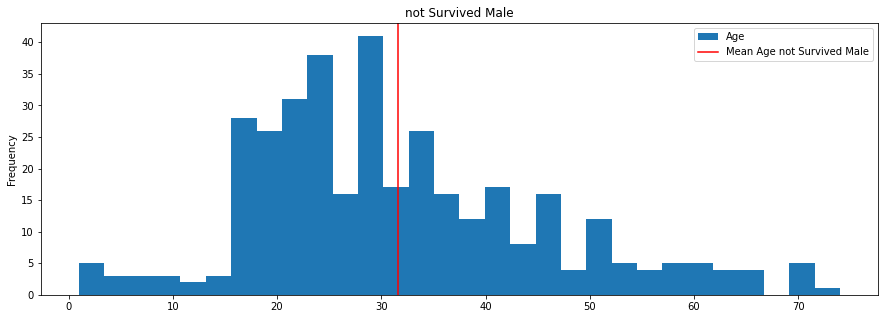

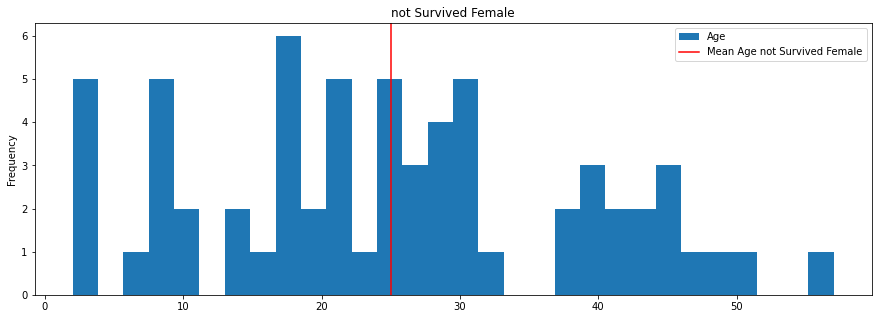

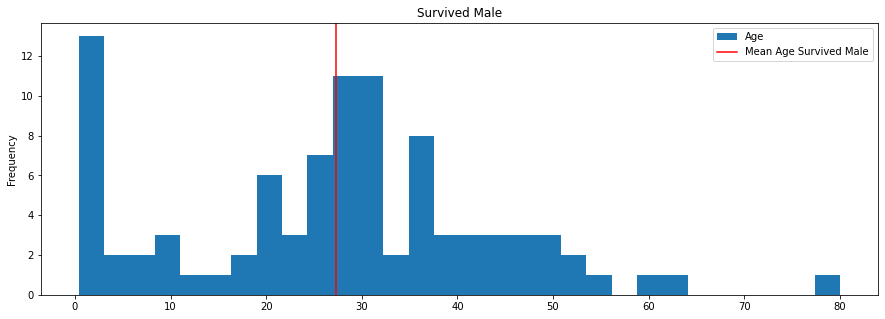

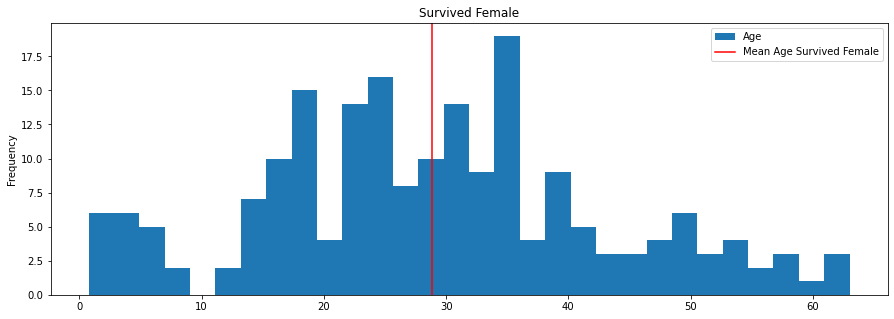

In [34]:
data[data['Survived'] == 0]['Age'].plot(kind='hist', title='not Survived', figsize=(15, 5), bins=30);
plt.axvline(x=not_survived_mean_age, color='red')
plt.legend(['Age', 'Mean Age not Survived'])
plt.show()
data[data['Survived'] == 1]['Age'].plot(kind='hist', title='Survived', figsize=(15, 5), bins=30);
plt.axvline(x=survived_mean_age, color='red')
plt.legend(['Age', 'Mean Age Survived'])
plt.show()



data[(data['Survived'] == 0) & (data['Sex'] == 'male')]['Age'].plot(kind='hist', title='not Survived Male', figsize=(15, 5), bins=30);
plt.axvline(x=not_survived_mean_age_male, color='red')
plt.legend(['Age', 'Mean Age not Survived Male'])
plt.show()
data[(data['Survived'] == 0) & (data['Sex'] == 'female')]['Age'].plot(kind='hist', title='not Survived Female', figsize=(15, 5), bins=30);
plt.axvline(x=not_survived_mean_age_female, color='red')
plt.legend(['Age', 'Mean Age not Survived Female'])
plt.show()



data[(data['Survived'] == 1) & (data['Sex'] == 'male')]['Age'].plot(kind='hist', title='Survived Male', figsize=(15, 5), bins=30);
plt.axvline(x=survived_mean_age_male, color='red')
plt.legend(['Age', 'Mean Age Survived Male'])
plt.show()
data[(data['Survived'] == 1) & (data['Sex'] == 'female')]['Age'].plot(kind='hist', title='Survived Female', figsize=(15, 5), bins=30);
plt.axvline(x=survived_mean_age_female, color='red')
plt.legend(['Age', 'Mean Age Survived Female'])
plt.show()